In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
import pickle

In [ ]:
from google.colab import drive
MOUNT_PATH='/content/drive'
drive.mount(MOUNT_PATH)

Mounted at /content/drive


In [ ]:
WORKING_DIR=f"{MOUNT_PATH}/MyDrive/FYP_Research_Work/dataset/CustomYogaPosesDataset"

In [ ]:
data = pd.read_csv(f"{WORKING_DIR}/keypoint_dataset_new.csv")
data.head()

,k1_x,k1_y,k1_p,k2_x,k2_y,k2_p,k3_x,k3_y,k3_p,k4_x,...,k15_x,k15_y,k15_p,k16_x,k16_y,k16_p,k17_x,k17_y,k17_p,Class
0,0.248363,0.988875,0.749154,0.222718,0.962208,0.680954,0.221534,0.961254,0.729572,0.265502,...,0.692126,0.067509,0.877089,0.270551,0.233796,0.394278,0.275390,0.167830,0.307971,Bow
1,0.319011,0.980275,0.744329,0.308862,0.951305,0.517245,0.309322,0.951718,0.581457,0.376711,...,0.646815,0.032957,0.935496,0.340087,0.272476,0.605018,0.328719,0.255500,0.478043,Bow
2,0.286038,0.972985,0.829567,0.281545,0.941433,0.726869,0.280697,0.944313,0.764036,0.356777,...,0.715659,0.025231,0.883431,0.376844,0.286950,0.711141,0.363921,0.284849,0.335781,Bow
3,0.507017,0.983977,0.774683,0.487512,0.955939,0.804198,0.488540,0.956600,0.666367,0.519918,...,0.554976,0.099207,0.852644,0.291220,0.350245,0.422425,0.256430,0.385976,0.579248,Bow
4,0.224236,0.030090,0.782850,0.194544,0.057158,0.870040,0.193511,0.052705,0.880403,0.260465,...,0.660984,0.853596,0.524160,0.353623,0.823096,0.464320,0.350177,0.805742,0.345975,Bow


In [ ]:

# Use value_counts to get the count of each unique value in the 'class' column
class_counts = data['Class'].value_counts()

# Print the number of different classes and the count of datapoints for each class
print("Number of different classes:", len(class_counts))
print("\nCount of datapoints for each class:")
print(class_counts)


Number of different classes: 21

Count of datapoints for each class:
Cow                                  57
Wheel                                56
Camel                                56
Warrior Two                          56
Upward-Facing Dog                    55
Crow                                 54
Side Plank                           54
Forward Bend with Shoulder Opener    53
Bridge                               53
Extended Side Angle                  52
Tree                                 50
Warrior One                          50
Shoulder Stand                       49
Warrior Three                        47
Bow                                  47
Plank                                47
Half-Moon                            46
Extended Hand to Toe                 46
Sphinx                               45
Cat                                  43
Low Lunge                            43
Name: Class, dtype: int64


In [ ]:
X = data.drop(columns=['Class'])
Y = data['Class']

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
X_train

,k1_x,k1_y,k1_p,k2_x,k2_y,k2_p,k3_x,k3_y,k3_p,k4_x,...,k14_p,k15_x,k15_y,k15_p,k16_x,k16_y,k16_p,k17_x,k17_y,k17_p
331,0.096584,0.621855,0.833973,0.080050,0.640502,0.724018,0.076904,0.636845,0.737998,0.093701,...,0.918348,0.336473,0.433809,0.894641,0.932283,0.648071,0.906676,0.253058,0.222607,0.782247
44,0.491671,0.126696,0.136636,0.459802,0.123073,0.241004,0.459493,0.093364,0.227062,0.466824,...,0.034181,0.594769,0.536735,0.078319,0.562474,0.609822,0.050201,0.538600,0.551654,0.072901
307,0.729738,0.304276,0.682489,0.712803,0.286931,0.816269,0.713763,0.286510,0.787554,0.654395,...,0.821927,0.667456,0.489033,0.657485,0.584305,0.700092,0.768742,0.583252,0.694109,0.728086
323,0.100845,0.353371,0.901726,0.079737,0.371075,0.669280,0.077063,0.333716,0.816456,0.083788,...,0.942254,0.716414,0.382389,0.929647,0.149895,0.811074,0.643243,0.927168,0.421633,0.953900
1009,0.445297,0.922846,0.535923,0.465667,0.906631,0.631968,0.467438,0.906542,0.569442,0.466882,...,0.867792,0.399318,0.218970,0.926082,0.700477,0.268634,0.825691,0.668455,0.263736,0.779650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,0.141507,0.647163,0.611045,0.119610,0.665046,0.850726,0.121197,0.628039,0.592151,0.126523,...,0.881923,0.373475,0.375650,0.599598,0.942979,0.576519,0.872164,0.257645,0.197467,0.655249
466,0.547243,0.069563,0.757728,0.530127,0.050601,0.761084,0.565494,0.063561,0.690223,0.490004,...,0.818854,0.648036,0.442071,0.892190,0.224754,0.911937,0.625169,0.877192,0.435545,0.817403
121,0.089754,0.106167,0.608884,0.129277,0.107875,0.549608,0.128557,0.106349,0.657165,0.173459,...,0.296557,0.910898,0.737836,0.615029,0.784760,0.373591,0.462166,0.903696,0.328683,0.620171
1044,0.480423,0.038391,0.747687,0.501549,0.056376,0.645997,0.500300,0.053673,0.715097,0.493879,...,0.703535,0.541798,0.656502,0.699382,0.738796,0.851115,0.760085,0.713137,0.818105,0.467676


In [ ]:
X_train.iloc[0]

k1_x     0.096584
k1_y     0.621855
k1_p     0.833973
k2_x     0.080050
k2_y     0.640502
k2_p     0.724018
k3_x     0.076904
k3_y     0.636845
k3_p     0.737998
k4_x     0.093701
k4_y     0.696285
k4_p     0.834298
k5_x     0.088340
k5_y     0.688931
k5_p     0.827541
k6_x     0.204414
k6_y     0.750159
k6_p     0.916794
k7_x     0.178667
k7_y     0.617596
k7_p     0.620026
k8_x     0.345318
k8_y     0.809331
k8_p     0.942531
k9_x     0.185166
k9_y     0.455999
k9_p     0.772330
k10_x    0.424565
k10_y    0.691492
k10_p    0.826326
k11_x    0.176570
k11_y    0.311771
k11_p    0.899527
k12_x    0.466827
k12_y    0.643310
k12_p    0.852040
k13_x    0.428260
k13_y    0.598103
k13_p    0.880925
k14_x    0.705478
k14_y    0.633976
k14_p    0.918348
k15_x    0.336473
k15_y    0.433809
k15_p    0.894641
k16_x    0.932283
k16_y    0.648071
k16_p    0.906676
k17_x    0.253058
k17_y    0.222607
k17_p    0.782247
Name: 331, dtype: float64

In [ ]:
X_valid

,k1_x,k1_y,k1_p,k2_x,k2_y,k2_p,k3_x,k3_y,k3_p,k4_x,...,k14_p,k15_x,k15_y,k15_p,k16_x,k16_y,k16_p,k17_x,k17_y,k17_p
576,0.522771,0.911949,0.609212,0.503894,0.921883,0.613233,0.501511,0.920926,0.499995,0.459458,...,0.708835,0.495830,0.311953,0.677345,0.532438,0.133789,0.627446,0.540199,0.127359,0.746140
312,0.186113,0.516202,0.632114,0.171749,0.532401,0.773987,0.170401,0.519519,0.796785,0.183869,...,0.921476,0.315532,0.284798,0.912241,0.927976,0.472846,0.888596,0.170204,0.160819,0.877073
70,0.514455,0.153359,0.677294,0.533465,0.127323,0.603322,0.540741,0.120422,0.822288,0.602968,...,0.497668,0.283159,0.978568,0.874081,0.570826,0.894936,0.792130,0.674627,0.968889,0.778858
682,0.420179,0.143992,0.679242,0.414045,0.130108,0.952725,0.439726,0.112617,0.898974,0.436778,...,0.774842,0.777850,0.705085,0.781920,0.844127,0.942585,0.765748,0.872486,0.927339,0.892132
896,0.271319,0.381479,0.849420,0.284950,0.365035,0.854822,0.290155,0.359745,0.822169,0.342994,...,0.898557,0.779433,0.323461,0.898706,0.879473,0.838911,0.898402,0.898741,0.143048,0.791884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,0.543216,0.833646,0.605873,0.560792,0.860739,0.671531,0.557092,0.861066,0.806034,0.637639,...,0.692421,0.297262,0.187714,0.845416,0.629021,0.179208,0.597652,0.619226,0.172897,0.608641
120,0.034036,0.173029,0.560722,0.067948,0.169069,0.615779,0.065832,0.172260,0.563783,0.131554,...,0.433718,0.960655,0.746873,0.726027,0.937339,0.313198,0.531511,0.935885,0.287364,0.470828
533,0.295526,0.442879,0.817816,0.292307,0.472638,0.800647,0.291403,0.466538,0.581968,0.336509,...,0.881417,0.920633,0.616483,0.684513,0.918872,0.174790,0.938086,0.914088,0.913603,0.655840
25,0.304258,0.015514,0.807599,0.270565,0.031674,0.742549,0.268325,0.032307,0.752679,0.306534,...,0.725609,0.628634,0.918885,0.666534,0.375000,0.925423,0.114138,0.307977,0.925913,0.139540


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform labels in y_train and y_valid
y_train_encoded = label_encoder.fit_transform(y_train)
y_valid_encoded = label_encoder.transform(y_valid)

In [ ]:
# Retrieve the mapping of labels to encoded values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Label Mapping:", label_mapping)

Label Mapping: {'Bow': 0, 'Bridge': 1, 'Camel': 2, 'Cat': 3, 'Cow': 4, 'Crow': 5, 'Extended Hand to Toe': 6, 'Extended Side Angle': 7, 'Forward Bend with Shoulder Opener': 8, 'Half-Moon': 9, 'Low Lunge': 10, 'Plank': 11, 'Shoulder Stand': 12, 'Side Plank': 13, 'Sphinx': 14, 'Tree': 15, 'Upward-Facing Dog': 16, 'Warrior One': 17, 'Warrior Three': 18, 'Warrior Two': 19, 'Wheel': 20}


In [ ]:
import tensorflow as tf

In [ ]:
num_classes = 21

In [ ]:
classifier_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [ ]:
X_train.shape

(847, 51)

In [ ]:
# Compile and train the classifier
classifier_model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


In [ ]:
classifier_model.summary()  # Print the model summary to verify the changes


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               6656      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 25)                1625      
                                                                 
Total params: 16537 (64.60 KB)
Trainable params: 16537 (64.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
epochs=30
history = classifier_model.fit(X_train, y_train_encoded, validation_data=(X_valid, y_valid_encoded), epochs=30)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


27/27 [==============================] - 1s 11ms/step - loss: 2.9822 - accuracy: 0.0945 - val_loss: 2.8931 - val_accuracy: 0.1132
Epoch 2/30
 1/27 [>.............................] - ETA: 0s - loss: 2.8624 - accuracy: 0.2188

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


27/27 [==============================] - 0s 3ms/step - loss: 2.8107 - accuracy: 0.1995 - val_loss: 2.7329 - val_accuracy: 0.2123
Epoch 3/30
27/27 [==============================] - 0s 3ms/step - loss: 2.6082 - accuracy: 0.2845 - val_loss: 2.5079 - val_accuracy: 0.3396
Epoch 4/30
27/27 [==============================] - 0s 3ms/step - loss: 2.3624 - accuracy: 0.3896 - val_loss: 2.2705 - val_accuracy: 0.3396
Epoch 5/30
27/27 [==============================] - 0s 3ms/step - loss: 2.1015 - accuracy: 0.4073 - val_loss: 2.0047 - val_accuracy: 0.4906
Epoch 6/30
27/27 [==============================] - 0s 3ms/step - loss: 1.8418 - accuracy: 0.5313 - val_loss: 1.7824 - val_accuracy: 0.5425
Epoch 7/30
27/27 [==============================] - 0s 3ms/step - loss: 1.6274 - accuracy: 0.5797 - val_loss: 1.6022 - val_accuracy: 0.5566
Epoch 8/30
27/27 [==============================] - 0s 3ms/step - loss: 1.4475 - accuracy: 0.6399 - val_loss: 1.4958 - val_accuracy: 0.6085
Epoch 9/30
27/27 [=============

In [ ]:
# Evaluate the model on the validation set
loss, accuracy = classifier_model.evaluate(X_valid, y_valid_encoded)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')


8/8 [==============================] - 0s 1ms/step - loss: 0.4409 - accuracy: 0.8613
Validation Loss: 0.4409447908401489
Validation Accuracy: 0.8613445162773132


In [ ]:
# Convert the model to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(classifier_model)
tflite_model = converter.convert()

# Save the TFLite model
with open(f'{MOUNT_PATH}/MyDrive/FYP_Research_Work/dataset/CustomYogaPoses/keypoints_to_pose_classifier_v1.tflite', 'wb') as f:
    f.write(tflite_model)


In [ ]:
import matplotlib.pyplot as plt

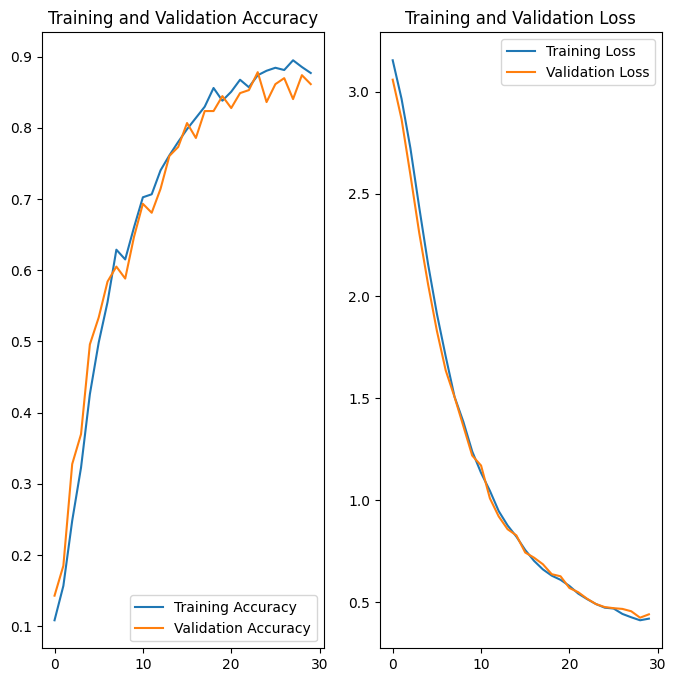

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Hyperparameter tuning - method 1

In [ ]:
!pip install scikeras


In [ ]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

In [ ]:
# Define a function that creates a Keras model
def create_model(num_layers=2, neurons=64):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_shape=(X_train.shape[1],)))
    for _ in range(num_layers - 1):
        model.add(Dense(neurons, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Create a KerasClassifier based on the above function
model = KerasClassifier(build_fn=create_model, verbose=0)

In [ ]:
# Define the hyperparameters to tune
param_grid = {
    'num_layers': [1, 2, 3],  # Number of hidden layers
}

In [ ]:
# Create a GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=1)


In [ ]:

# Perform the grid search
grid_result = grid.fit(X_train, y_train_encoded)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


ValueError: Invalid parameter num_layers for estimator KerasClassifier.
This issue can likely be resolved by setting this parameter in the KerasClassifier constructor:
`KerasClassifier(num_layers=1)`
Check the list of available parameters with `estimator.get_params().keys()`

In [ ]:

# Print the best parameters and the corresponding accuracy
print("Best parameters found: ", grid_result.best_params_)
print("Best accuracy found: ", grid_result.best_score_)


## Hyperparameter tuning - method 2

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
!pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 1.4 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt

In [ ]:
def model_builder(hp):
  model = keras.Sequential()

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units_l1 = hp.Int('units', min_value=32, max_value=512, step=32)
  model.add(keras.layers.Dense(units=hp_units_l1, activation='relu'))

  # Tune the number of units in the second Dense layer
  # Choose an optimal value between 32-512
  hp_units_l2 = hp.Int('units', min_value=64, max_value=256, step=32)
  model.add(keras.layers.Dense(units=hp_units_l2, activation='relu'))
  model.add(keras.layers.Dense(units=25, activation='softmax'))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

Reloading Tuner from my_dir/intro_to_kt/tuner0.json


In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
tuner.search(X_train, y_train_encoded, validation_data=(X_valid, y_valid_encoded), epochs=50, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal number of units in the second densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")


The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 480 and the optimal number of units in the second densely-connected
layer is 480 and the optimal learning rate for the optimizer
is 0.001.



In [ ]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train_encoded, validation_data=(X_valid, y_valid_encoded), epochs=50)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


30/30 [==============================] - 1s 9ms/step - loss: 3.2052 - accuracy: 0.0652 - val_loss: 3.1409 - val_accuracy: 0.0798
Epoch 2/50
27/30 [==========================>...] - ETA: 0s - loss: 3.0988 - accuracy: 0.1215

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


30/30 [==============================] - 0s 4ms/step - loss: 3.0903 - accuracy: 0.1272 - val_loss: 3.0198 - val_accuracy: 0.1471
Epoch 3/50
30/30 [==============================] - 0s 3ms/step - loss: 2.9309 - accuracy: 0.1714 - val_loss: 2.8574 - val_accuracy: 0.1681
Epoch 4/50
30/30 [==============================] - 0s 4ms/step - loss: 2.7357 - accuracy: 0.2324 - val_loss: 2.6486 - val_accuracy: 0.2437
Epoch 5/50
30/30 [==============================] - 0s 3ms/step - loss: 2.5144 - accuracy: 0.3333 - val_loss: 2.4579 - val_accuracy: 0.3193
Epoch 6/50
30/30 [==============================] - 0s 3ms/step - loss: 2.3135 - accuracy: 0.3491 - val_loss: 2.2704 - val_accuracy: 0.4076
Epoch 7/50
30/30 [==============================] - 0s 4ms/step - loss: 2.1338 - accuracy: 0.4479 - val_loss: 2.1079 - val_accuracy: 0.4202
Epoch 8/50
30/30 [==============================] - 0s 4ms/step - loss: 1.9724 - accuracy: 0.4974 - val_loss: 1.9465 - val_accuracy: 0.5084
Epoch 9/50
30/30 [=============

In [ ]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(X_train, y_train_encoded, validation_data=(X_valid, y_valid_encoded), epochs=best_epoch)

Epoch 1/47


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


30/30 [==============================] - 1s 9ms/step - loss: 3.1964 - accuracy: 0.0589 - val_loss: 3.1437 - val_accuracy: 0.0966
Epoch 2/47
21/30 [====================>.........] - ETA: 0s - loss: 3.0943 - accuracy: 0.1220

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


30/30 [==============================] - 0s 4ms/step - loss: 3.0728 - accuracy: 0.1178 - val_loss: 3.0228 - val_accuracy: 0.1345
Epoch 3/47
30/30 [==============================] - 0s 4ms/step - loss: 2.9231 - accuracy: 0.2019 - val_loss: 2.8466 - val_accuracy: 0.2437
Epoch 4/47
30/30 [==============================] - 0s 4ms/step - loss: 2.7157 - accuracy: 0.2871 - val_loss: 2.6209 - val_accuracy: 0.2647
Epoch 5/47
30/30 [==============================] - 0s 4ms/step - loss: 2.4826 - accuracy: 0.3291 - val_loss: 2.3888 - val_accuracy: 0.4496
Epoch 6/47
30/30 [==============================] - 0s 4ms/step - loss: 2.2482 - accuracy: 0.4217 - val_loss: 2.1807 - val_accuracy: 0.4790
Epoch 7/47
30/30 [==============================] - 0s 3ms/step - loss: 2.0370 - accuracy: 0.4606 - val_loss: 1.9748 - val_accuracy: 0.5420
Epoch 8/47
30/30 [==============================] - 0s 4ms/step - loss: 1.8551 - accuracy: 0.5121 - val_loss: 1.8440 - val_accuracy: 0.5126
Epoch 9/47
30/30 [=============

In [ ]:
eval_result = hypermodel.evaluate(X_valid, y_valid_encoded)
print("[test loss, test accuracy]:", eval_result)

NameError: name 'hypermodel' is not defined

# MAML Approach

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

In [ ]:
#num_classes = 25

In [ ]:
# Define MAML model
def get_maml_model():
    # Create a meta-learner model
    meta_model = models.Sequential([
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])

    # Compile the meta-model
    meta_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return meta_model

In [ ]:
# Define MAML training procedure
def maml_train_step(model, support_set, query_set):
    # Training step for one meta-batch
    support_input, support_labels = support_set
    query_input, query_labels = query_set

    # Fine-tune the model on the support set
    model.fit(support_input, support_labels, epochs=5, verbose=0)

    # Evaluate on the query set
    loss, accuracy = model.evaluate(query_input, query_labels, verbose=0)

    return loss, accuracy

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
# Convert labels to one-hot encoding
num_classes = len(np.unique(y_train_encoded))
labels_train_onehot = to_categorical(y_train_encoded, num_classes)
labels_test_onehot = to_categorical(y_valid_encoded, num_classes)

In [ ]:
# Print information about the dataset
print(f"Number of classes: {num_classes}")
print(f"Number of training samples: {len(X_train)}")
print(f"Number of testing samples: {len(X_valid)}")

Number of classes: 25
Number of training samples: 951
Number of testing samples: 238


In [ ]:
# Split the dataset into meta-training and meta-testing sets
meta_train_data = (X_train, labels_train_onehot)
meta_test_data = (X_valid, labels_test_onehot)

In [ ]:
# Create a MAML model
maml_model = get_maml_model()

In [ ]:
# Number of meta-batches and meta-iterations
num_meta_batches = 100
num_meta_iterations = 5

In [ ]:
 import random

def sample_meta_batch(meta_data, batch_size=5):
    # meta_data is a tuple containing images and labels for the meta-training set
    X, labels = meta_data

    # Convert labels to a pandas Series
    labels_series = pd.Series(labels)

    # Randomly sample a meta-batch
    sampled_indices = random.sample(range(len(X)), batch_size)
    sampled_X = X.iloc[sampled_indices]
    sampled_labels = labels.iloc[sampled_indices]

    return sampled_X, sampled_labels

In [ ]:
# Meta-training loop
for meta_iteration in range(num_meta_iterations):
    for meta_batch in range(num_meta_batches):
        # Sample a random meta-batch from the meta-training set
        support_set = sample_meta_batch(meta_train_data)
        query_set = sample_meta_batch(meta_train_data)

        # Perform a meta-training step
        loss, accuracy = maml_train_step(maml_model, support_set, query_set)

        print(f'Meta-Iteration: {meta_iteration + 1}, Meta-Batch: {meta_batch + 1}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')

ValueError: Data must be 1-dimensional

# Metric Learning

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
# Define input layer for 51 features
inputs = layers.Input(shape=(51,))

In [ ]:
# Hidden layers with Leaky ReLU activation
x = layers.Dense(128, activation="relu")(inputs)
x = layers.Dense(64, activation="relu")(x)

# Embedding layer for metric learning
embeddings = layers.Dense(32)(x)  # Adjust embedding dimension as needed

# Output layer for classification
outputs = layers.Dense(num_classes, activation="softmax")(embeddings)

# Define model
model = models.Model(inputs=inputs, outputs=outputs)

# Loss function using cross-entropy
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
# Compile model
model.compile(loss=loss_fn, optimizer=optimizer, metrics=["accuracy"])

In [ ]:
# Train the model
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


30/30 [==============================] - 1s 2ms/step - loss: 3.1495 - accuracy: 0.0852
Epoch 2/10
30/30 [==============================] - 0s 2ms/step - loss: 2.9192 - accuracy: 0.2292
Epoch 3/10
30/30 [==============================] - 0s 2ms/step - loss: 2.5630 - accuracy: 0.3575
Epoch 4/10
30/30 [==============================] - 0s 2ms/step - loss: 2.1347 - accuracy: 0.4395
Epoch 5/10
30/30 [==============================] - 0s 2ms/step - loss: 1.7637 - accuracy: 0.5037
Epoch 6/10
30/30 [==============================] - 0s 2ms/step - loss: 1.4800 - accuracy: 0.6172
Epoch 7/10
30/30 [==============================] - 0s 2ms/step - loss: 1.2705 - accuracy: 0.6467
Epoch 8/10
30/30 [==============================] - 0s 2ms/step - loss: 1.0892 - accuracy: 0.7077
Epoch 9/10
30/30 [==============================] - 0s 2ms/step - loss: 0.9546 - accuracy: 0.7455
Epoch 10/10
30/30 [==============================] - 0s 2ms/step - loss: 0.8560 - accuracy: 0.7550


In [ ]:
# Evaluate the model
model.evaluate(X_valid, y_valid_encoded)

1/8 [==>...........................] - ETA: 2s - loss: 0.9889 - accuracy: 0.6562

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


8/8 [==============================] - 0s 6ms/step - loss: 0.8941 - accuracy: 0.7185


[0.894101619720459, 0.7184873819351196]

In [ ]:
# Extract embeddings for further analysis
pose_embeddings = model.predict(X_valid)

8/8 [==============================] - 0s 6ms/step


In [ ]:
# Get predictions from the trained model
y_pred = model.predict(X_valid)

# Convert predictions to class labels (e.g., using argmax)
y_pred_labels = tf.math.argmax(y_pred, axis=1)

# Calculate the confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_valid_encoded, y_pred_labels)

# Print or visualize the confusion matrix
print(confusion_matrix.numpy())  # Or use libraries like matplotlib for visualization


8/8 [==============================] - 0s 3ms/step
[[ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0
   0]
 [ 0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0
   0]
 [ 1  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  1
   0]
 [ 0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  1  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0  0  0  0  1  0  0
   0]
 [ 0  0  0  0  0  0 13  0  1  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  1  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  8  0  0  0  2  1  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  2  0  0  0  3  4  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  